## Описание данных
**user_data:**

* client – идентификатор пользователя

* premium – является ли клиент премиум

* age – возраст

**logs:**

* client – идентификатор пользователя

* success – результат (успех - 1, нет - 0)

* platform – платформа

* time – время в формате Unix

### Задание 1

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику

Сколько уникальных значений принимает переменная platform?

In [44]:
import pandas as pd

user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [45]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [46]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [47]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [48]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [49]:
print(f'Ответ: {logs["platform"].nunique()}')

Ответ: 3


### Задание 2

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например: *12, 123, 456*

In [50]:
success_counts = logs.loc[logs['success'] == True]['client'].value_counts()
max_success_users = success_counts.loc[success_counts == success_counts.max()]

max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

Ответ: 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

### Задание 3

С какой платформы осуществляется наибольшее количество успешных операций?

In [51]:
max_success_platform = logs.loc[logs['success'] == True]['platform'].value_counts()

print(f'Ответ: {max_success_platform.idxmax()}')

Ответ: phone


### Задание 4

Какая платформа наиболее популярна среди премиумных клиентов?

In [52]:
premium_logs = logs.merge(user_data, on='client')

premium_logs.loc[premium_logs['premium'] == True]['platform']\
    .value_counts()\
    .idxmax()

'phone'

Ответ: phone

### Задание 5

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

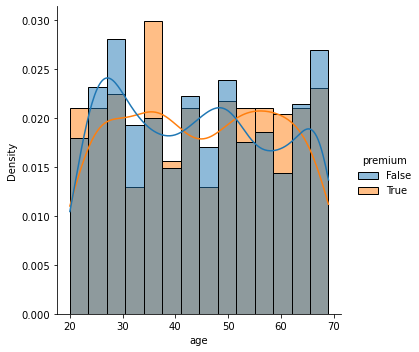

In [54]:
sns.displot(data=premium_logs,
            x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=14)

### Задание 6

Постройте график распределения числа успешных операций:
- x – число успешных операций
- y – число клиентов, совершивших столько успешных операций

<AxesSubplot:xlabel='successes', ylabel='count'>

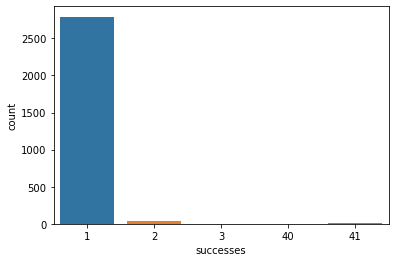

In [55]:
success_count = logs.loc[logs['success'] == True]['client'].value_counts()
success_count = success_count.rename('successes')

sns.countplot(x=success_count)

- Несколько клиентов совершили более 40 успешных действий
- Бóльшая часть наблюдений сосредоточена в левой части графика

### Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить **plt.figure(figsize=(12, 8))** в начало соответствующей ячейки

Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='count'>

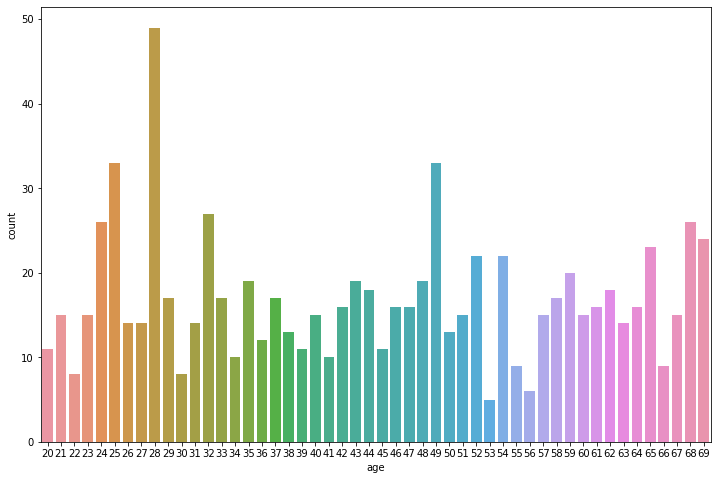

In [56]:
plt.figure(figsize=(12,8))

sns.countplot(data=premium_logs.loc[(premium_logs['platform'] == 'computer')\
                                   & (premium_logs['success'] == True)], 
             x='age')


Ответ: 28